In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [2]:
df = pd.read_csv('../datasets/clean_data.csv')

In [3]:
# No of records in dataset
df.shape

(2620, 8)

In [4]:
# Null records
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2620.0,93.834683,113.609349,12.83,42.0,61.735,90.00,1422.0
area,2620.0,1282.925191,692.566319,300.00,877.0,1091.500,1471.25,6700.0
bhk,2620.0,2.443893,0.811984,1.00,2.0,2.000,3.00,8.0
bathroom,1403.0,2.359230,0.844951,1.00,2.0,2.000,3.00,7.0
age,1729.0,1.355119,2.102682,0.00,0.0,0.000,3.00,32.0


In [7]:
#df[df.status=='Under Construction']
df[df.age.isnull()]

,price,area,status,bhk,bathroom,age,location,builder
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
18,100.00,1833,Ready to move,3,NaN,NaN,Sholinganallur,Appaswamy Real Estate
50,65.69,1381,Ready to move,3,NaN,NaN,Tiruvottiyur,Hansa Estates
62,84.79,1220,Under Construction,3,3.0,NaN,Selaiyur,DAC Promoters
78,108.00,1972,Ready to move,3,NaN,NaN,Sholinganallur,Appaswamy Real Estate
...,...,...,...,...,...,...,...,...
2596,88.00,1062,Under Construction,2,2.0,NaN,Mogappair,GJ ESTATES
2597,73.71,1031,Under Construction,2,2.0,NaN,Selaiyur,GJ ESTATES
2598,44.00,898,Under Construction,2,2.0,NaN,Iyappanthangal,GJ ESTATES
2607,340.00,2030,Under Construction,4,3.0,NaN,T Nagar,HomeFirst


In [8]:
df.age.fillna(0,inplace=True)

In [9]:
df.age[df.age.isnull()]

Series([], Name: age, dtype: float64)

In [10]:
#bathrooms
print(f"Bathrooms : {df.bathroom.unique()}")
print(f"BHK : {df.bhk.unique()}")

Bathrooms : [nan  2.  1.  3.  4.  5.  6.  7.]
BHK : [2 3 4 1 5 6 8]


In [11]:
#df[(df.bathroom ==2)]
df[(df.bhk ==2)]

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
9,24.56,622,Under Construction,2,NaN,0.0,Perungalathur,Isha Homes
13,51.46,919,Under Construction,2,NaN,0.0,Pammal,Asset Tree Homes
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [12]:
# fill NaN with -1 for bathrooms
df.bathroom.fillna(-1,inplace=True)

In [13]:
def find_bathroom(x,y):
    if y == -1:
        if x > 4:
            return x+1
        else:
            return x
    else:
        return y

In [14]:
df['bathroom'] = df.apply(lambda x: find_bathroom(x['bhk'],x['bathroom']),axis=1)

In [15]:
df.isnull().sum()

price       0
area        0
status      0
bhk         0
bathroom    0
age         0
location    0
builder     0
dtype: int64

## Let's start with Univariate analysis

In [16]:
# for numeric coluns
#[feat for feat in df.columns if df[feat].dtypes != 'O']
numeric_cols = [feat for feat in df.select_dtypes(include=np.number)]

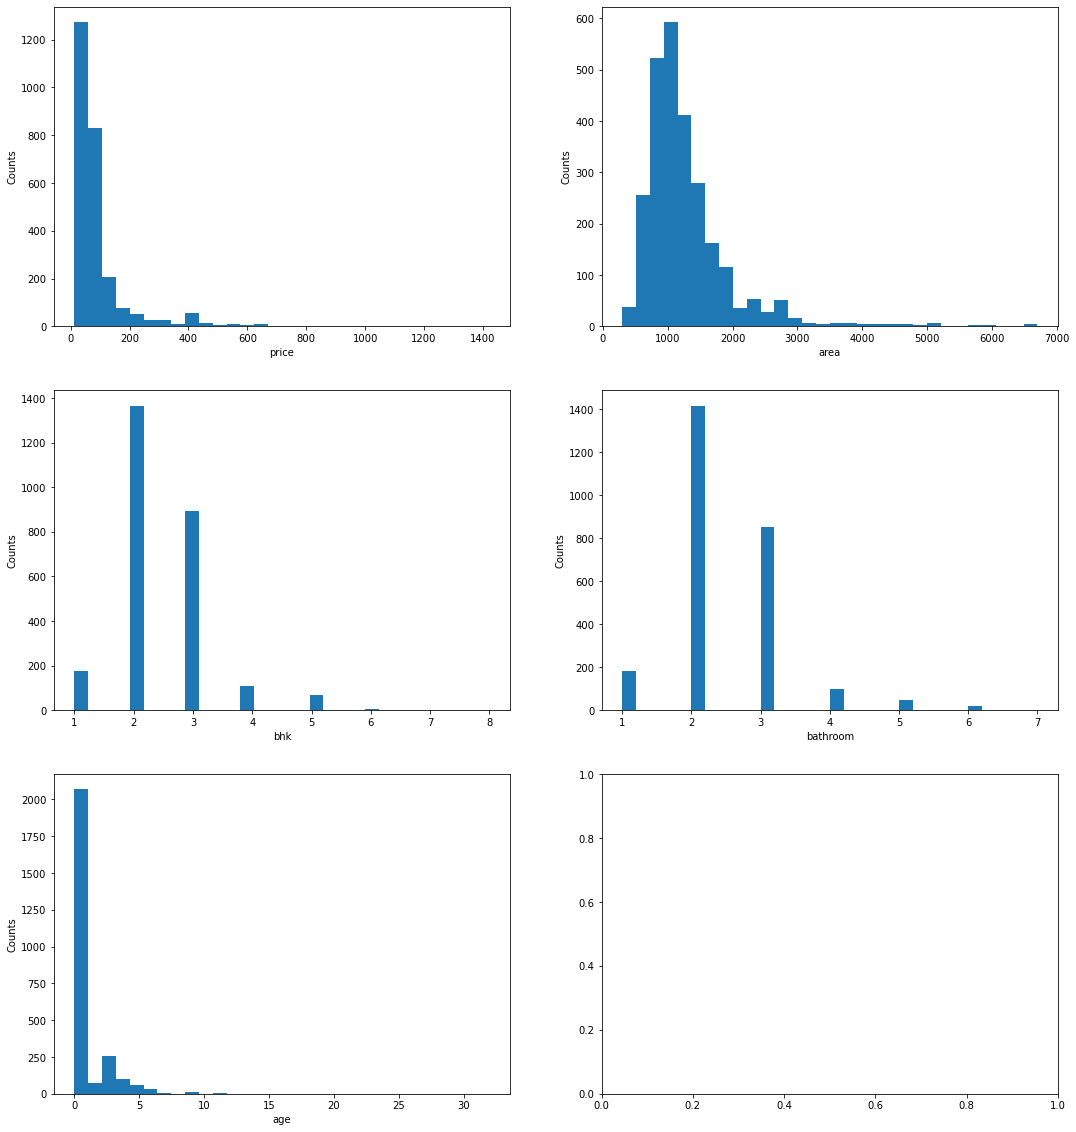

In [17]:
i,j=0,0
PLOTS_PER_ROW =2
fig, ax = plt.subplots(math.ceil(len(numeric_cols)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(18,20))
for feat in numeric_cols:
    ax[i][j].hist(df[feat],bins=30)
    ax[i][j].set_xlabel(feat)
    ax[i][j].set_ylabel("Counts")
    j+=1
    if j%PLOTS_PER_ROW ==0:
        i+=1
        j=0
plt.show()


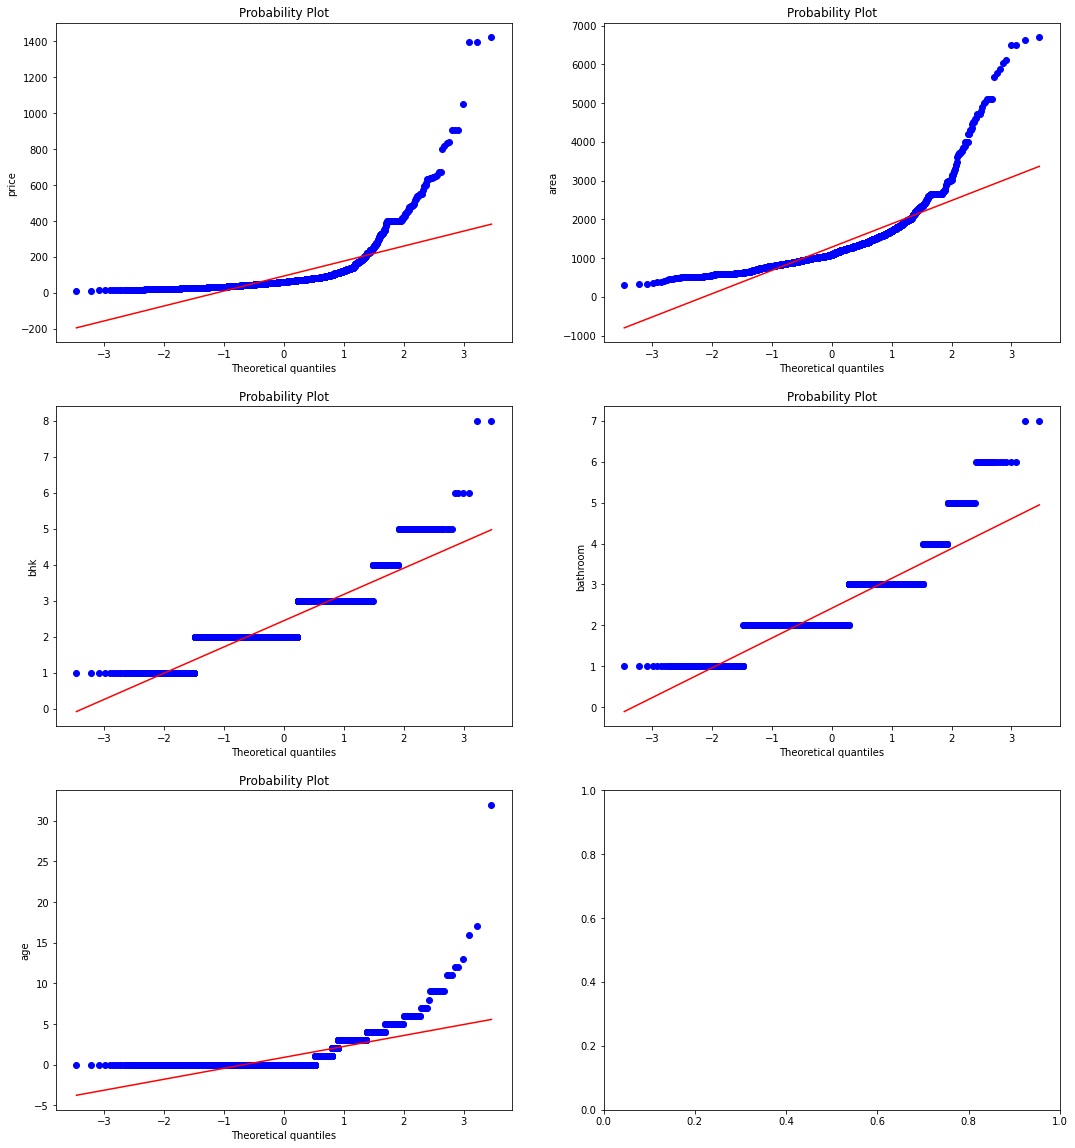

In [18]:
# QQ plot
i,j=0,0
PLOTS_PER_ROW = 2
fig, ax = plt.subplots(math.ceil(len(numeric_cols)/PLOTS_PER_ROW),PLOTS_PER_ROW,figsize=(18,20))
for feat in numeric_cols:
    stats.probplot(df[feat],plot = ax[i][j] )
    ax[i][j].set_ylabel(feat)
    j += 1
    if j%PLOTS_PER_ROW == 0:
        j=0
        i+=1
plt.show()

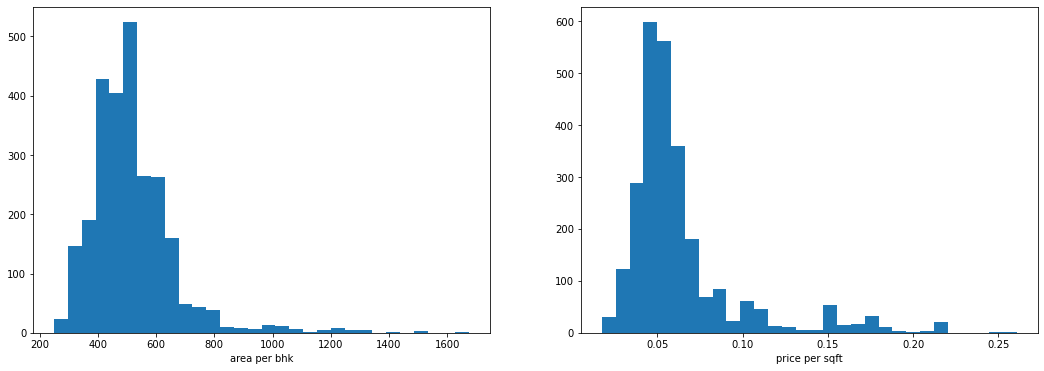

In [19]:
# area/bhk
area_per_bhk = df['area']/df['bhk']
price_per_sqft = df['price']/df['area']

fig,ax = plt.subplots(1,2, figsize=(18,6))
ax[0].hist(area_per_bhk,bins=30)
ax[0].set_xlabel("area per bhk")
ax[1].hist(price_per_sqft,bins=30)
ax[1].set_xlabel("price per sqft")
plt.show()

In [20]:
df['area_per_bhk'] = df['area']/df['bhk']
df['price_per_sqft'] = df['price']/df['area']

In [21]:
df['price_per_sqft'] = df['price_per_sqft']*100000

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2620.0,93.834683,113.609349,12.830000,42.000,61.735000,90.000000,1422.000000
area,2620.0,1282.925191,692.566319,300.000000,877.000,1091.500000,1471.250000,6700.000000
bhk,2620.0,2.443893,0.811984,1.000000,2.000,2.000000,3.000000,8.000000
bathroom,2620.0,2.419466,0.819299,1.000000,2.000,2.000000,3.000000,7.000000
age,2620.0,0.894275,1.824666,0.000000,0.000,0.000000,1.000000,32.000000
area_per_bhk,2620.0,517.649752,147.914705,250.000000,427.625,499.583333,579.125000,1675.000000
price_per_sqft,2620.0,6387.418466,3409.167048,1743.119266,4600.000,5417.177914,6645.812201,26086.956522


In [23]:
# make a copy of df as df_main
df_main = df.copy()

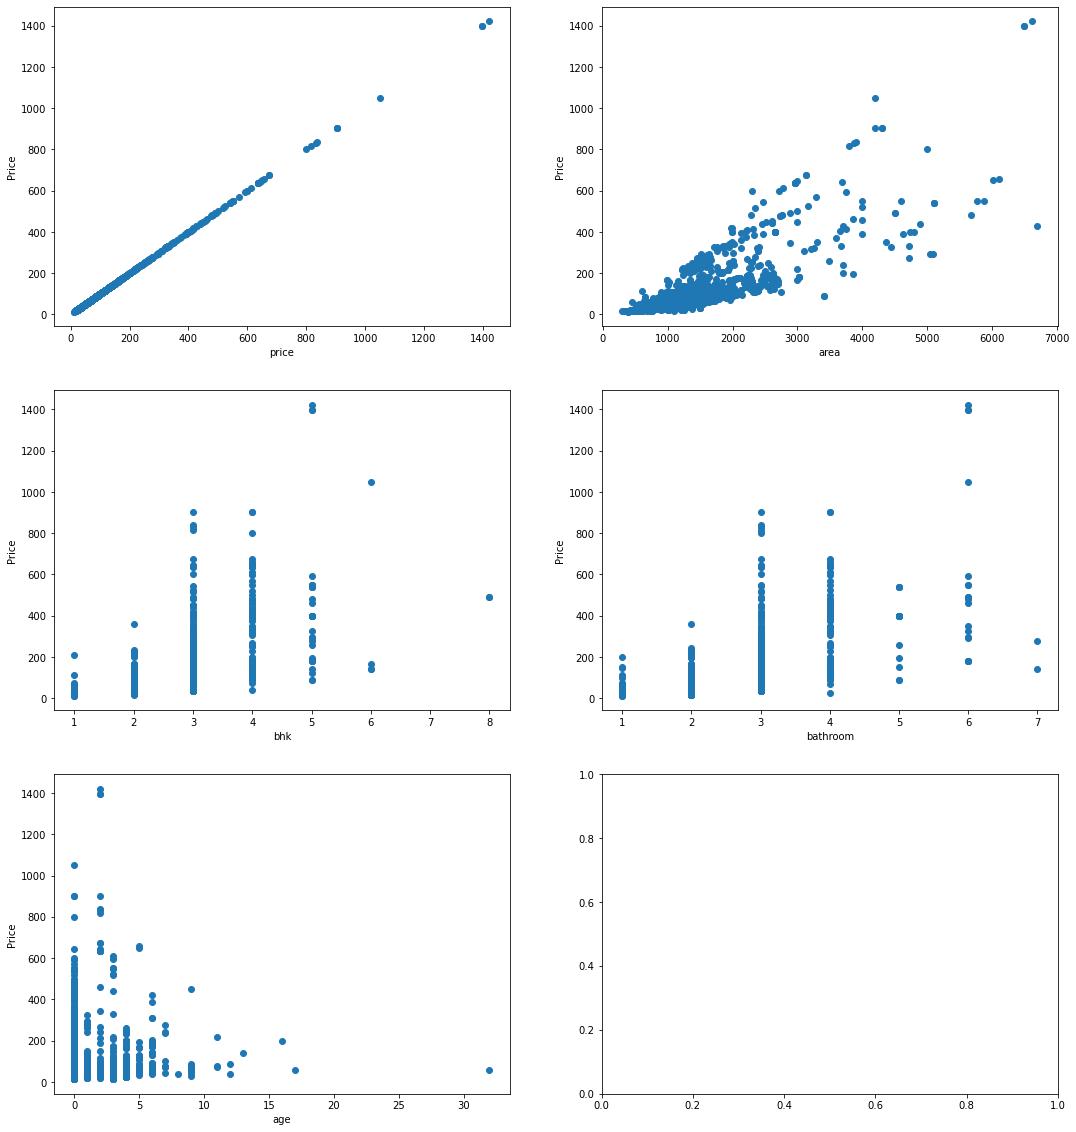

In [24]:
# Let's draw scatter plot again price with each feature
i,j=0,0
PLOTS_PER_ROW =2
fig,ax = plt.subplots(math.ceil(len(numeric_cols)/PLOTS_PER_ROW),PLOTS_PER_ROW,figsize = (18,20))
for feat in numeric_cols:
    ax[i,j].scatter(df[feat],df['price'])
    ax[i,j].set_ylabel("Price")
    ax[i,j].set_xlabel(feat)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()


In [25]:
# categorical features
loc_list = []
price_list = []
for key,subdf in df.groupby("location"):
    loc_list.append(key)
    price_list.append(subdf['price'].mean())


In [26]:
df_loc_price = pd.DataFrame({'location':loc_list, 'price':price_list})

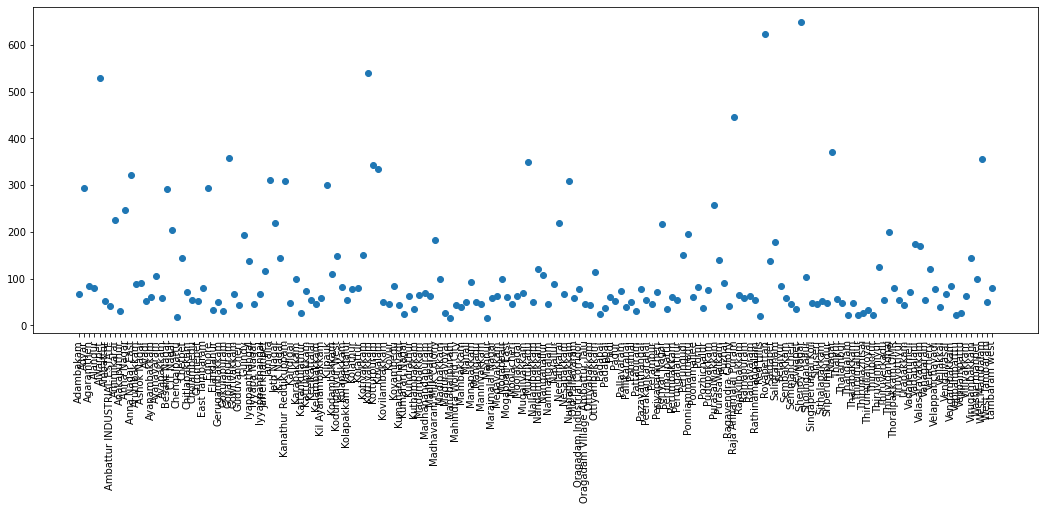

In [27]:
plt.figure(figsize=(18,6))
plt.scatter(df_loc_price['location'],df_loc_price['price'])
plt.xlabel = "location"
plt.ylabel = "price"
plt.xticks(rotation=90)
plt.show()

## Outliers detection process

In [28]:
def remove_outliers_price_sqft(df_local):
    df_out = pd.DataFrame()
    for key, subdf in df_local.groupby('location'):
        s = np.std(subdf['price_per_sqft'])#.std()
        m = np.mean(subdf['price_per_sqft'].mean())
        reduce_df = subdf[(subdf['price_per_sqft'] > ( m - s) ) & (subdf['price_per_sqft'] <= ( m + s)) ]
        df_out = pd.concat([df_out, reduce_df],ignore_index=True)
    return df_out

df1 = remove_outliers_price_sqft(df)


In [29]:
#df1
df_feat=df1

In [30]:
df

,price,area,status,bhk,bathroom,age,location,builder,area_per_bhk,price_per_sqft
0,37.49,872,Ready to move,2,2.0,1.0,Sembakkam,MP Developers,436.000000,4299.311927
1,93.54,1346,Under Construction,3,2.0,0.0,Selaiyur,DAC Promoters,448.666667,6949.479941
2,151.00,2225,Under Construction,3,3.0,0.0,Mogappair,Casagrand Builder Private Limited,741.666667,6786.516854
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders,514.000000,4766.536965
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd,294.000000,7190.476190
...,...,...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties,375.000000,3666.666667
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties,375.000000,3666.666667
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties,400.000000,3750.000000
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties,425.000000,3705.882353


# Ignore bolow cells till feature engg

In [237]:
# get the upper and lower limits to remove the outliers
apb_IQR = df['area_per_bhk'].quantile(0.75) - df['area_per_bhk'].quantile(0.25)
pps_IQR = df['price_per_sqft'].quantile(0.75) - df['price_per_sqft'].quantile(0.25)
lower_apb_limit = df['area_per_bhk'].quantile(0.25) - 1.5*apb_IQR
upper_apb_limit = df['area_per_bhk'].quantile(0.75) + 1.5*apb_IQR
lower_pps_limit = df['price_per_sqft'].quantile(0.25) - 1.5*pps_IQR
upper_pps_limit = df['price_per_sqft'].quantile(0.75) + 1.5*pps_IQR

In [238]:
lower_apb_limit, upper_apb_limit, lower_pps_limit, upper_pps_limit

(200.375, 806.375, 1531.2816985931831, 9714.530502344696)

In [251]:
df_price_sqft_rmv = df[(df['price_per_sqft'] > lower_pps_limit) & (df['price_per_sqft'] <= upper_pps_limit)]

In [252]:
df_area_bhk_rmv = df_price_sqft_rmv[(df_price_sqft_rmv['area_per_bhk'] > lower_apb_limit) & (df_price_sqft_rmv['area_per_bhk'] <= upper_apb_limit)]

In [254]:
df_feat = df_area_bhk_rmv

In [ ]:
# lets try 3rd std to remove 


In [135]:
# Let's have a look at high area and price records before removing outliers
#df[df.area > 2000][['price','area']]
df['area'].describe()
df[(df.bhk == 2) & (df.area < 600)][['area','price','bhk']]

,area,price,bhk
4,588,42.28,2
43,588,42.28,2
54,528,29.62,2
206,594,35.34,2
208,591,35.16,2
209,598,35.58,2
302,561,28.00,2
304,576,30.00,2
567,588,42.28,2
570,588,42.28,2


In [37]:
# outlier detection
std_price = df.price.std()
mean_price = df.price.mean()

In [39]:
df.price.describe()

count    2620.000000
mean       93.834683
std       113.609349
min        12.830000
25%        42.000000
50%        61.735000
75%        90.000000
max      1422.000000
Name: price, dtype: float64

In [43]:
#get 3rd min and max std 
#min_std_val = 
df.price.quantile(1-0.997)
df.price.quantile()

61.735

## Feature Engg

In [31]:
df_feat.shape

(1919, 10)

In [32]:
# let's handle categorical feature
#df['builder'].unique()
builder_stats = df_feat['builder'].value_counts(ascending=False)
builder_stats

seller                               323
MC Foundation                        196
Appaswamy Real Estate                101
Radiance Realty Developers            62
Propsource Realty Private Limited     50
                                    ... 
Pragyansh                              1
Prop Mart Technologies                 1
S Suresh Kumar                         1
Evrostos Properties                    1
MAXWORTH PROPERTIES                    1
Name: builder, Length: 114, dtype: int64

In [33]:
builder_stats_less_then_10 = builder_stats[builder_stats <=10]
builder_stats_less_then_10

24K Realtors              10
SS PROPERTIES             10
EK Realtors               10
SP Homes Pvt Ltd          10
Baashyaam Group            9
                          ..
Pragyansh                  1
Prop Mart Technologies     1
S Suresh Kumar             1
Evrostos Properties        1
MAXWORTH PROPERTIES        1
Name: builder, Length: 69, dtype: int64

In [34]:
df_feat['builder'] = df_feat['builder'].apply(lambda x: 'other' if x in builder_stats_less_then_10 else x)

In [35]:
df_feat['builder']

0               other
1               other
2               other
3              seller
4               other
            ...      
1914    MC Foundation
1915    MC Foundation
1916    MC Foundation
1917    MC Foundation
1918    MC Foundation
Name: builder, Length: 1919, dtype: object

In [36]:
#df['location'].unique()
location_stats = df_feat['location'].value_counts(ascending=False)
location_stats

Veppampattu            112
Sholinganallur          86
Madhavaram              78
Pammal                  75
Perungudi               69
                      ... 
Jafferkhanpet            1
Perambur                 1
Mahindra World City      1
Ayanavaram               1
Purasawalkam             1
Name: location, Length: 136, dtype: int64

In [37]:
location_stats_less_then_10 = location_stats[location_stats <= 10]
location_stats_less_then_10

Velachery              10
Alwarpet               10
Iyappanthangal         10
Urapakkam               9
Thandalam               9
                       ..
Jafferkhanpet           1
Perambur                1
Mahindra World City     1
Ayanavaram              1
Purasawalkam            1
Name: location, Length: 87, dtype: int64

In [38]:
df_feat['location'] = df_feat['location'].apply(lambda x: 'other' if x in location_stats_less_then_10 else x)

In [39]:
df['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [40]:
#drop additional columns
df_new = df_feat.drop(['area_per_bhk','price_per_sqft'],axis=1)

In [41]:
df_final = pd.get_dummies(df_new,columns=['status','location','builder'])

In [42]:
Y = df_final['price']
X = df_final.drop(['price'],axis=1)

In [43]:
Y

0       82.00
1       77.80
2       82.00
3       87.00
4       78.00
        ...  
1914    85.00
1915    66.08
1916    57.12
1917    52.08
1918    50.40
Name: price, Length: 1919, dtype: float64

# Split the dataset into train and test datasets

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
X_train.shape,X_test.shape

((1535, 102), (384, 102))

In [46]:
y_train.shape,y_test.shape

((1535,), (384,))

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
r2_score(y_test,y_pred)

0.8879023641664662

In [176]:
# Let's try Decision tree regressor


In [52]:
lr.coef_

array([ 1.35435759e-01, -2.43890050e+01, -8.26279363e-02, -3.24278297e-01,
       -3.21078898e+00,  3.21078897e+00, -2.02393886e+01,  1.19009448e+02,
       -1.76337718e+01, -8.89466425e+00,  5.15024192e+00, -1.97194240e+01,
       -2.51251984e+01, -2.14992756e+01, -4.48602633e+01, -3.07388309e+01,
       -2.44000980e+01,  1.81534154e+02, -1.21301218e+01, -4.27740230e+01,
       -6.18222760e+00, -2.32164979e+01, -2.08891103e+01, -4.68640486e+00,
       -7.56790224e+00,  1.55259334e+01, -2.14185527e+01, -7.45104348e+00,
       -2.16343012e+02, -2.77924811e+01,  1.03079162e+01, -1.19737090e+01,
       -1.61893238e+01, -2.71583834e+00,  2.01936397e+01, -9.68604238e+00,
       -2.93114474e+00, -7.93280522e+00, -4.31960611e+00,  1.45560187e+02,
       -2.68507578e+01, -7.95653421e+00, -1.63735121e+01, -2.80136651e+01,
       -1.96353712e+01,  1.52230016e+02, -4.81539188e+01, -4.52786962e+00,
       -2.87073491e+01, -1.71048694e+01, -9.93485562e+00,  7.46853647e+01,
       -4.12725951e+00, -